<a href="https://colab.research.google.com/github/hardikdhamija96/AeroFit/blob/main/Aerofitcasestudy_HardikDhamija_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🟦 Business Case - Aerofit - Descriptive Statistics & Probability

<div align="center">
  <img src="https://raw.githubusercontent.com/hardikdhamija96/AeroFit/refs/heads/main/mainLogoFinal.png" width="520">
</div>

### 🔹 About Aerofit

- **Leading Fitness Brand**: Aerofit is a well-known brand in the fitness equipment industry.
- **Wide Product Range**:
  - Treadmills
  - Exercise bikes
  - Gym equipment
  - Fitness accessories
- **Caters to Everyone**: Designed to meet the fitness needs of people from all categories and fitness levels.

## 🔷 Business Problem

- We are working with customer purchase data from **Aerofit**.
- As data analysts supporting the **marketing and product strategy team**, our goal is to:
  - Understand **which types of customers** prefer **which treadmill models**.
- This analysis will help Aerofit:
  - Recommend the **right products** to new customers
  - Personalize outreach based on customer characteristics like:
    - `Age`
    - `Income`
    - `Gender`
    - `Fitness level` ,etc.


### 🔹 Objectives

- Perform **descriptive analytics** to create detailed **customer profiles** for each treadmill product.
- Understand how **customer characteristics** (like gender, age group, income, fitness level, etc.) vary across different treadmill types.
- Use **tables and charts** to visualize and summarize key patterns in customer behavior.

### 🔹 Our Approach

We'll explore customer behavior using a combination of:
- Descriptive statistics and visual analysis
- Probability-based profiling using conditional distributions
- Group-wise insights to build customer profiles for each product


### 🔹Product Portifolio

<div align="center">
  <img src="https://raw.githubusercontent.com/hardikdhamija96/AeroFit/refs/heads/main/Portfolio.png" width="400">
</div>

## 🔷 Initial Hypotheses

- **Income vs Product Choice**: Customers with higher income are more likely to buy the premium KP781 treadmill.
- **Age Factor**: Younger customers may prefer the entry-level KP281, while older users may go for KP481 or KP781.
- **Gender Preference**: Males might show a higher preference for advanced models like KP781.
- **Usage Frequency**: Regular or daily users may invest in more durable, feature-rich models.
- **Marital Status**: Married individuals may lean towards mid-range products like KP481 for shared use at home.



## 🔷 1. Load and Understand the Data

In [2]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Linking Google Drive for file access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing and loading file
file_path = '/content/drive/MyDrive/AeroFit Project/aerofit_treadmill.xlsx'

import pandas as pd
df = pd.read_excel(file_path)
print("Dataset Loaded Successfully. Shape:", df.shape)

Dataset Loaded Successfully. Shape: (180, 9)


In [5]:
# quick look over data
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [6]:
# columns we have
df.columns.tolist()

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

#### 🔹 Column Observations

- `Product` : Treadmill model purchased (KP281, KP481, or KP781)
- `Age` : Age of the customer (in years)
- `Gender` : Gender of the customer (Male/Female)
- `Education` : Years of formal education completed by the customer
- `MaritalStatus` : Marital status of the customer (Single/Married)
- `Usage` : How frequently the treadmill is used (days per week)
- `Fitness` : Self-reported fitness level (scale of 1 to 5, where 5 = very fit)
- `Income` : Annual income of the customer (in USD)
- `Miles` : Average miles walked/ran on the treadmill per week


In [7]:
# checking type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### 🔹 `df.info()` Observations:

#### 🔹 Feature Types
- The following columns are of `object` type:
  - `Product`, `Gender`, and `MaritalStatus`
  - These can be converted to `category` type to optimize memory usage and improve performance during analysis.

- The remaining 6 features are **numerical**:
  - `Age`, `Education`, `Usage`, `Fitness`, `Income`, and `Miles`
  - These can be used as-is for analysis, and later **grouped into bins** (e.g., income group, usage frequency) to derive **segment-based insights**.



#### 🔹Numerical Features Overview



In [8]:
# non graphical overview of numerical data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


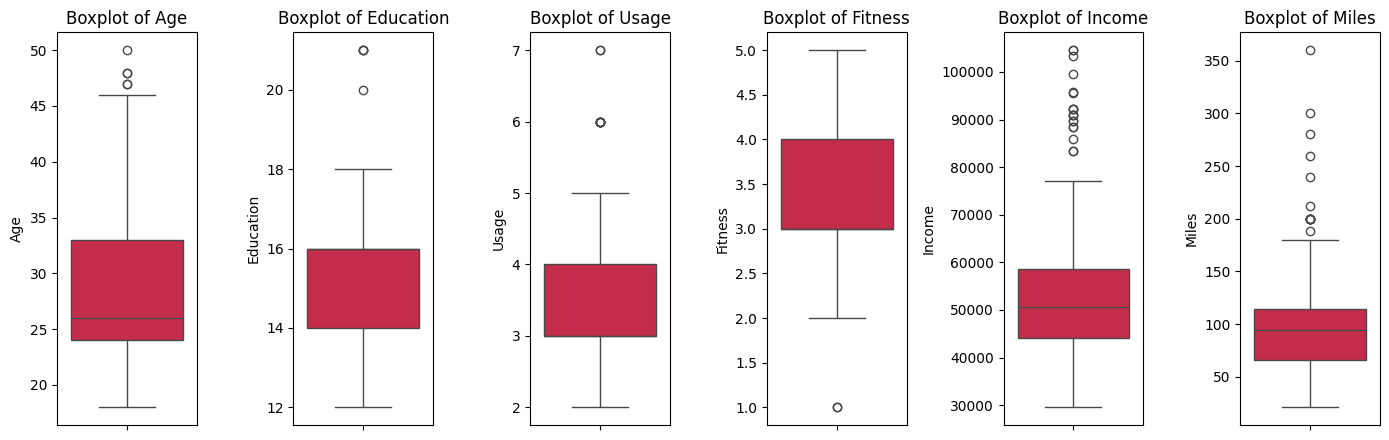

In [9]:
# graphical overview of numerical data
num_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']


plt.figure(figsize=(14, 4.5))

for i, col in enumerate(num_cols):
  plt.subplot(1,6,i+1)
  sns.boxplot(y=df[col], color='crimson')
  plt.title('Boxplot of '+ col)

plt.tight_layout()
plt.show()

### 🔹 Observations: Numerical Features (from `describe()` + Boxplots)

- **Age**:
  - Most customers are young adults (median: 26 years).
  - Mild right skew with a few outliers beyond 45 years.
  
- **Education**:
  - Median education level is 16 years, suggesting college graduates.
  - Slight spread, with a few outliers at 20–21 years (possibly postgraduates).

- **Usage (per week)**:
  - Most users plan to use the treadmill 3–4 times/week.
  - Max is 7, with light right skew and a couple of high-usage outliers.

- **Fitness (self-rated 1–5)**:
  - Median fitness level is 3.
  - Values are spread across all levels, with one low-end outlier at 1.

- **Income (annual in USD)**:
  - Median income is around `$50,596`, but distribution is right-skewed.
  - Several high-income outliers above `$75,000–$100,000`.

- **Miles (per week)**:
  - Customers expect to walk/run ~94 miles median per week.
  - A few high-end users reporting over 200+ miles — clear outliers present.

⚠️These observations support the need for `outlier handling` (especially in `Income` and `Miles`) and guide how we interpret user behavior based on frequency, fitness, and affordability.


#### 🔹Object Featuers Overview
- Three features all should be converted to category type
  - We will do that in `Data Preprocessing`

In [10]:
df.describe(include=[object])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


#### 🔹 Observations:
- The most frequently purchased product is **KP281**, selected by 80 out of 180 customers.
- **Male** customers form the majority.
- A significant portion of customers are **partnered**.

In [11]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


### 🔹Observation on Unique Values

- `Product`, `Gender`, and `MaritalStatus` are low-cardinality categorical features.
- `Usage`, `Fitness`, and `Education` have moderate distinct values — good for grouped analysis.
- `Age`, `Income`, and `Miles` are continuous with many unique values
  - ℹ️ already noted for possible binning or outlier treatment.


In [12]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [13]:
df.duplicated().sum()

np.int64(0)

### ✅ Missing Values Check

No missing values were found in the dataset across any of the columns.  


## 🔷 2. Data PreProcessing

In [14]:
# Checking What we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### 🔹2.1. Changing Data Type

- Columns like `Product`, `Gender`, and `MaritalStatus` are categorical by nature.
- We are converting them to `category` type.
- This improves performance and makes group-based analysis faster and cleaner

In [15]:
# changing data types to category
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [16]:
# Confirming updated types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


### 🔹2.2 Feature Extraction

- We are creating new relevant columns to get more meaningful group-wise insights.
- Features like `Income`, `Age`, `Miles`, and `Education` are continuous, so we are converting them into **grouped categories**.
- This helps us analyze patterns across customer segments more effectively.


#### 2.2.1 🔹IncomeGroup Column

- We are segmenting customers based on their income.
- This will help us analyze if product preferences vary across different income levels.
- Grouping income makes it easier to interpret trends compared to using raw values.

In [17]:
# checking income range
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [18]:
# Get percentiles
q25 = df['Income'].quantile(0.25)
q75 = df['Income'].quantile(0.75)
print(q25,q75)

44058.75 58668.0


In [19]:
# Function to label
def income_level(x):
    if x < q25:
        return 'Low Income'
    elif x > q75:
        return 'High Income'
    else:
        return 'Mid Income'

df['IncomeGroup'] = df['Income'].apply(income_level)

In [20]:
df['IncomeGroup'] = df['IncomeGroup'].astype('category')

In [21]:
df['IncomeGroup'].value_counts(normalize=True).round(2)

,proportion
IncomeGroup,
Mid Income,0.50
High Income,0.25
Low Income,0.25


#### 🔹 Income Grouping Strategy

- To understand customer behavior based on income, we grouped the `Income` column into 3 segments:
  - `Low Income`: Less than `$44,058`
  - `Mid Income`: Between `$44,058` and `$58,668`
  - `High Income`: More than `$58,668`
- These cutoffs are based on the 25th and 75th percentiles of the actual income data.
- Grouping income this way helps us compare product preferences across different earning levels more easily.




#### 2.2.2 🔹MilesGroup Column

- We are grouping the `Miles` column to understand how expected treadmill usage varies across customers.
- This helps us analyze whether people who plan to use the treadmill more prefer specific products.
- Grouping also makes it easier to compare trends instead of looking at raw mile values.


In [22]:
df['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


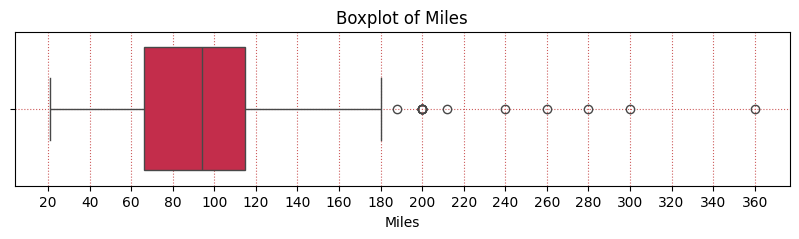

In [23]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = df['Miles'],color='crimson')
plt.xticks(np.arange(20,380,20))
plt.grid(color="indianred", ls=":")
plt.title('Boxplot of Miles')
plt.show()

In [24]:
min_miles = df['Miles'].min()
max_miles = df['Miles'].max()
median_miles = df['Miles'].median()
miles_25percentile = df['Miles'].quantile(0.25)
miles_75percentile = df['Miles'].quantile(0.75)

print(f"Minimum Miles: {min_miles}")
print(f"Maximum Miles: {max_miles}")
print(f"Median Miles: {median_miles}")
print(f"25th Percentile Miles: {miles_25percentile}")
print(f"75th Percentile Miles: {miles_75percentile}")

Minimum Miles: 21
Maximum Miles: 360
Median Miles: 94.0
25th Percentile Miles: 66.0
75th Percentile Miles: 114.75


In [25]:
def miles_level(x):
    if x < miles_25percentile:
        return 'Less Active'
    elif (x >= miles_25percentile) and (x <= miles_75percentile):
        return 'Moderately Active'
    elif (x > miles_75percentile) and (x <= 180):
        return 'Very Active'
    else:
        return 'Ultra Active'

df['MilesGroup'] = df['Miles'].apply(miles_level)


In [26]:
df['MilesGroup'] = df['MilesGroup'].astype('category')

In [27]:
df['MilesGroup'].value_counts()

,count
MilesGroup,
Moderately Active,99
Less Active,36
Very Active,32
Ultra Active,13


#### 🔹 Miles Grouping Strategy

- We grouped the `Miles` column into 4 categories based on how much customers plan to walk/run each week:
  - `Less Active`: Less than `66` miles
  - `Moderately Active`: Between `66` and `114.75` miles
  - `Very Active`: Between `114.75` and `180` miles
  - `Ultra Active`: More than `180` miles per week
- This helps us compare product choices based on expected treadmill usage.



#### 2.2.3 🔹 EducationGroup Column

- We are grouping the `Education` column into broader levels to analyze whether education background impacts treadmill preference.
- This helps simplify the data and makes trend comparisons across different qualification levels easier.


In [28]:
df['Education'].describe()

,Education
count,180.000000
mean,15.572222
std,1.617055
min,12.000000
25%,14.000000
50%,16.000000
75%,16.000000
max,21.000000


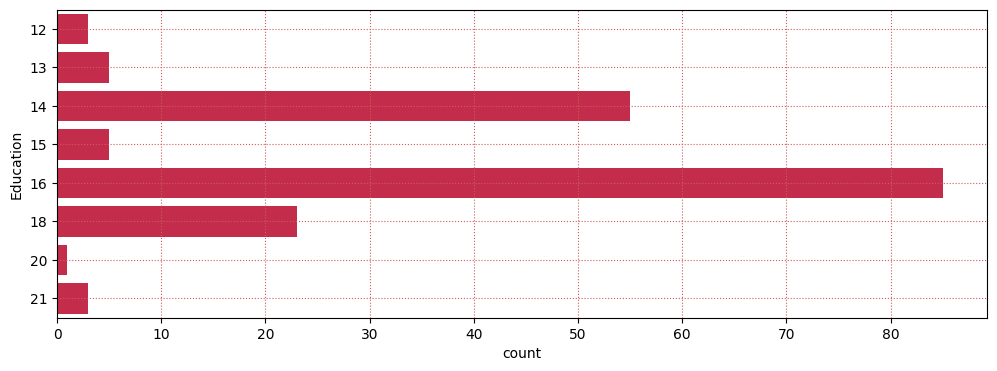

In [29]:
plt.figure(figsize=(12, 4))
sns.countplot(y=df['Education'],color='crimson')
plt.grid(color="indianred", ls=":")

In [30]:
def education_level(x):
    if x <= 12:
        return 'School'
    elif x <= 16:
        return 'Graduate'
    else:
        return 'Postgraduate'

df['EducationGroup'] = df['Education'].apply(education_level)


In [31]:
df['EducationGroup'] = df['EducationGroup'].astype('category')

In [32]:
df['EducationGroup'].value_counts()

,count
EducationGroup,
Graduate,150
Postgraduate,27
School,3


#### 🔹 Education Grouping Strategy

- We grouped the `Education` column based on total years of education into 3 levels:
  - `School`: 12 years or less
  - `Graduate`: 13 to 16 years
  - `Postgraduate`: More than 16 years
- These categories match common academic stages and make it easier to analyze trends across education levels.



#### 🔹2.2.4 AgeGroup Column

- We are grouping the `Age` column to explore how treadmill preferences vary across different age ranges.
- Grouping helps us identify trends and behaviors across younger, middle-aged, and older customer segments.


In [33]:
df['Age'].describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


- 4 groups can be made for `Age` column to create new column `AgeGroup`
  - `18-24`
  - `25-33`
  - `34-40`
  - `40-50`

In [34]:
# creating Age group with 4 groups
bins = [18,25,34,40,51]
labels = ['18-24', '25-33', '34-40', '40-50']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [35]:
df['AgeGroup'].value_counts()

,count
AgeGroup,
25-33,84
18-24,54
34-40,25
40-50,17


In [36]:
# confirming correctly done
df['AgeGroup'].describe()

,AgeGroup
count,180
unique,4
top,25-33
freq,84


#### 🔹 Age Grouping Strategy

- We grouped the `Age` column into 4 clear segments to help compare customer behavior across different age ranges:
  - `18–24`
  - `25–33`
  - `34–40`
  - `40–50`
- This allows us to identify trends in product preference across younger and older customer segments more easily.


#### 2.2.5 🔹 Price Column

- We created a `Price` column by mapping the actual selling price of each treadmill model.
- This allows us to build value-related metrics and compare financial impact across different customer segments.




In [37]:
# Creating Price Column

# Price mapping in USD
price_map = {
    'KP281': 1500,
    'KP481': 1750,
    'KP781': 2500
}

# Add new column
df['Price'] = df['Product'].map(price_map)


In [38]:
# setting its data type to int
df['Price'] = df['Price'].astype('int')

### 2.2.6 🔹 AspirationalSpend Column

- This column measures how much of a customer's income is being spent on a treadmill.
- It is calculated as `Price / Income`.
- A higher value indicates a more aspirational or stretch purchase.
- This helps us understand which customer groups are pushing their budgets to buy certain products.


In [39]:
df['AspirationalSpend'] = round(df['Price'] / df['Income'], 3)

In [40]:
df['AspirationalSpend'].head()

,AspirationalSpend
0,0.051
1,0.047
2,0.049
3,0.045
4,0.043


### 2.2.7 🔹 PricePerMile Column

- This column shows how much a customer is paying per mile of expected usage on the treadmill.
- It is calculated as `Price / Miles`.
- A lower value suggests higher value-for-money, while a higher value could indicate lower expected usage for the cost.
- Useful for profiling value-conscious vs. premium experience-driven customers.


In [41]:
df['PricePerMile'] = round(df['Price'] / df['Miles'], 2)

In [42]:
df['PricePerMile'].head()

,PricePerMile
0,13.39
1,20.00
2,22.73
3,17.65
4,31.91


`Income` and `Miles` have very varied range of data, required outlier handling

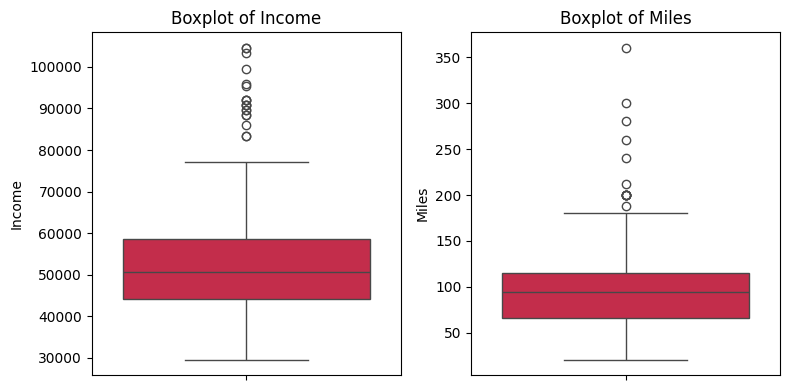

In [43]:
plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
sns.boxplot(y=df['Income'], color='crimson')
plt.title('Boxplot of Income')

plt.subplot(1,2,2)
sns.boxplot(y=df['Miles'],color='crimson')
plt.title('Boxplot of Miles')

plt.tight_layout()
plt.show()

### 🔹3. Outlier Handling (Capping at 95th Percentile)

- `Income` and `Miles` columns had some very high values in the boxplots.
- These values are not incorrect but can:
  - Skew summary stats like mean and standard deviation
  - Stretch the range of plots, making patterns harder to see
  - Unfairly affect comparisons across customer groups

- So, we applied **capping at the 95th percentile**:
  - Values above the 95th percentile were replaced with the 95th percentile value
  - No data was removed; just extreme impact was reduced

- This helps:
  - Maintain the full dataset
  - Focus on typical customer behavior
  - Get clearer, more balanced analysis


In [44]:
print(f"Income Cap: {round(df['Income'].quantile(0.95))}")
print(f"Miles Cap: {df['Miles'].quantile(0.95)}")

Income Cap: 90948
Miles Cap: 200.0


In [45]:
cap_income = round(df['Income'].quantile(0.95))
cap_miles = df['Miles'].quantile(0.95)

df['Income_Cap'] = np.where(df['Income']>cap_income, int(cap_income), df['Income'])
df['Miles_Cap'] = np.where(df['Miles']>cap_miles, int(cap_miles), df['Miles'])


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Product            180 non-null    category
 1   Age                180 non-null    int64   
 2   Gender             180 non-null    category
 3   Education          180 non-null    int64   
 4   MaritalStatus      180 non-null    category
 5   Usage              180 non-null    int64   
 6   Fitness            180 non-null    int64   
 7   Income             180 non-null    int64   
 8   Miles              180 non-null    int64   
 9   IncomeGroup        180 non-null    category
 10  MilesGroup         180 non-null    category
 11  EducationGroup     180 non-null    category
 12  AgeGroup           180 non-null    category
 13  Price              180 non-null    int64   
 14  AspirationalSpend  180 non-null    float64 
 15  PricePerMile       180 non-null    float64 
 16  Income_C

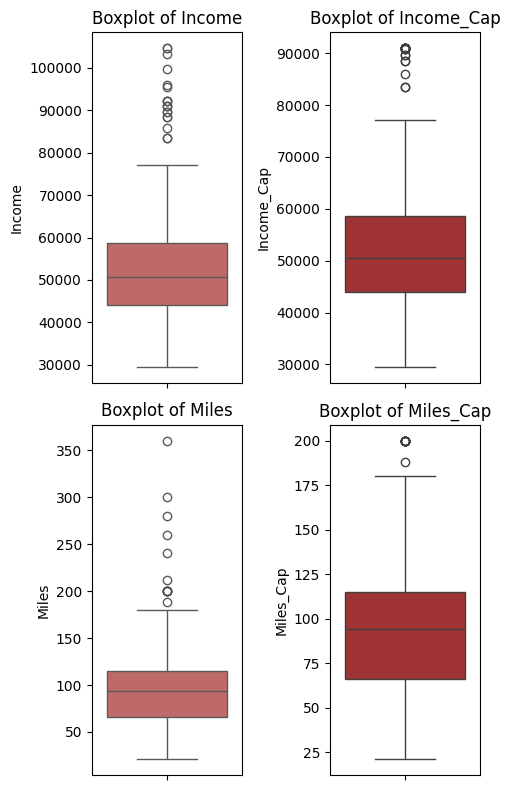

In [47]:
num_cols = ['Income', 'Income_Cap', 'Miles', 'Miles_Cap']
red_tones = ['indianred', 'firebrick', 'crimson', 'darkred']

plt.figure(figsize=(5, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2,2, i+1)
    sns.boxplot(y=df[col], color=red_tones[i%2])
    plt.title('Boxplot of '+ col)

plt.tight_layout()
plt.show()

### 🔹 Data Preprocessing Summary

- ✅ No missing values were found in the dataset.
  - Data was already clean and complete.
  
- ✅ Data types were optimized:
  - `Gender`, `MaritalStatus`, and `Product` were converted to `category` type for better performance and group-based analysis.

- ✅ Outliers were handled using capping (Winsorization):
  - `Income` and `Miles` had very high values.
  - Capped at the 95th percentile to reduce their influence on visualizations and summary stats.
  - No records were removed.

- ✅ Continuous features were grouped for better segmentation:
  - `Income` → `IncomeGroup`
  - `Miles` → `MilesGroup`
  - `Age` → `AgeGroup`
  - `Education` → `EducationGroup`
  - These groups support easier interpretation and customer-level profiling.

- ✅ New business-relevant columns were created:
  - `Price`: Mapped based on treadmill model
  - `AspirationalSpend`: Price as a fraction of income (spending strain)
  - `PricePerMile`: Value per expected usage

- ✅ The dataset is now analysis-ready:
  - Structured for both descriptive and probabilistic insights in the next sections.



In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Product            180 non-null    category
 1   Age                180 non-null    int64   
 2   Gender             180 non-null    category
 3   Education          180 non-null    int64   
 4   MaritalStatus      180 non-null    category
 5   Usage              180 non-null    int64   
 6   Fitness            180 non-null    int64   
 7   Income             180 non-null    int64   
 8   Miles              180 non-null    int64   
 9   IncomeGroup        180 non-null    category
 10  MilesGroup         180 non-null    category
 11  EducationGroup     180 non-null    category
 12  AgeGroup           180 non-null    category
 13  Price              180 non-null    int64   
 14  AspirationalSpend  180 non-null    float64 
 15  PricePerMile       180 non-null    float64 
 16  Income_C

## 🔷 3. Customer Profiling & Probability-Based Analysis

- In this section, we analyze how different customer groups behave in terms of product preference.
- We use a mix of visual analysis, probability calculations, and grouped insights to identify patterns.
- This helps us understand **who buys what** — and why — based on gender, income, fitness, usage, and more.


### 🔹 3.0 Product Overview

- We start by understanding the overall distribution of treadmill products.  
- This gives us a baseline view of which models are most popular before breaking it down by customer segments.



In [49]:
# quick look
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeGroup,MilesGroup,EducationGroup,AgeGroup,Price,AspirationalSpend,PricePerMile,Income_Cap,Miles_Cap
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income,Moderately Active,Graduate,18-24,1500,0.051,13.39,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income,Moderately Active,Graduate,18-24,1500,0.047,20.00,31836,75


In [50]:
products = df['Product'].value_counts().reset_index()
products['Probability'] = np.round(products['count'] / (products['count']).sum(), 2)
products.columns = ["Product","Count","Probability"]
products

,Product,Count,Probability
0,KP281,80,0.44
1,KP481,60,0.33
2,KP781,40,0.22


In [51]:
# Price mapping
price_map = {
    'KP281': 1500,
    'KP481': 1750,
    'KP781': 2500
}

# Add Price column
products['Price'] = products['Product'].map(price_map)

products

,Product,Count,Probability,Price
0,KP281,80,0.44,1500
1,KP481,60,0.33,1750
2,KP781,40,0.22,2500


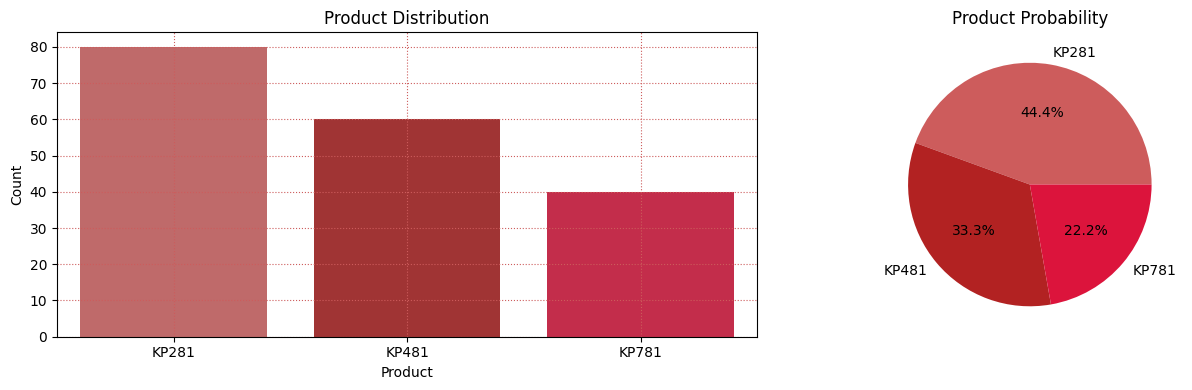

In [52]:
# Get the number of product categories
num_products = products.shape[0]

# Slice red_tones dynamically
pie_colors = red_tones[:num_products]

plt.figure(figsize=(14, 4))

# Barplot for product count
plt.subplot(1, 2, 1)
sns.barplot(data=products, x="Product", y="Count",hue="Product", palette=pie_colors)
plt.title("Product Distribution")
plt.grid(color="indianred", linestyle=":")

# Pie chart for product probability
plt.subplot(1, 2, 2)
plt.pie(products['Count'],
        labels=products['Product'],
        autopct='%1.1f%%',
        colors=pie_colors)
plt.title("Product Probability")

plt.tight_layout()
plt.show()


In [53]:
# Ensuring both columns are numeric
products['Count'] = products['Count'].astype(int)
products['Price'] = products['Price'].astype(float)

# revenue column
products['Revenue'] = products['Count'] * products['Price']

products

,Product,Count,Probability,Price,Revenue
0,KP281,80,0.44,1500.0,120000.0
1,KP481,60,0.33,1750.0,105000.0
2,KP781,40,0.22,2500.0,100000.0


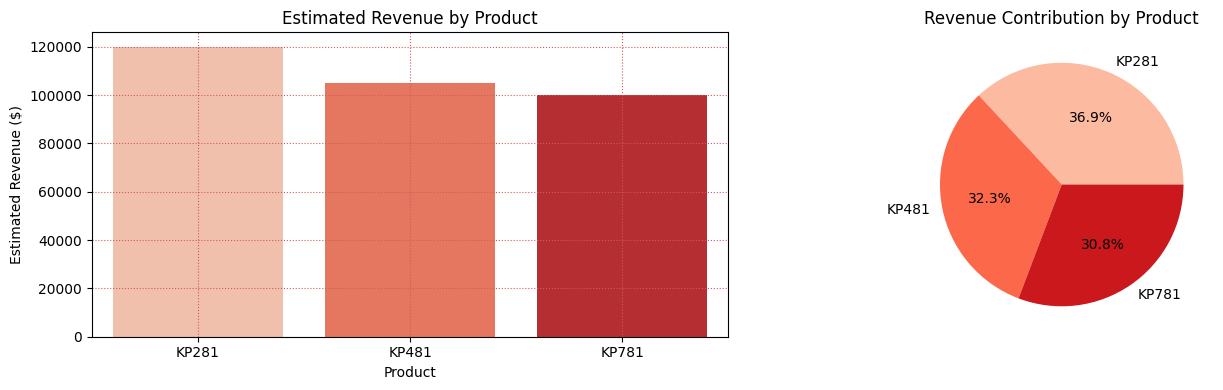

In [54]:
plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
sns.barplot(data=products, x='Product', y='Revenue',hue='Product', palette='Reds')
plt.title('Estimated Revenue by Product')
plt.ylabel('Estimated Revenue ($)')
plt.xlabel('Product')
plt.grid(color='indianred', linestyle=':')
plt.tight_layout()

plt.subplot(1,2,2)
plt.pie(products['Revenue'], labels=products['Product'], autopct='%1.1f%%', colors=sns.color_palette('Reds', n_colors=len(products)))
plt.title('Revenue Contribution by Product')

plt.show()


#### 🔹 Summary: Overall Product & Revenue Distribution

- `KP281` leads the market with `80 units sold`, a probability of `0.44`, and contributes the **highest revenue** of `$120,000`.
  - Although it's the entry-level model, its **high purchase probability** and large volume make it the **top revenue contributor**.
  
- `KP481` holds a moderate ground with `60 units sold`, `0.33` probability, and generates `$105,000` revenue.
  - With a **balanced price point and steady demand**, it shows stable performance across customer segments.

- `KP781`, while purchased by only `22%` of customers, still contributes `$100,000` in revenue — almost at par with KP481.
  - This indicates a **premium segment willing to pay significantly more**, despite lower purchase probability.

- The gap between **product popularity** and **revenue share** suggests that **both affordability and value perception** play a role in influencing customer decisions.

🔵 This analysis confirms that **KP281 dominates in both reach and returns**, while **KP781 performs well revenue-wise due to high price**, despite being less frequently bought.


### 🔹 3.1 Gender-Based Analysis

- We analyze how product preference varies across male and female customers.  
- This includes comparing product distribution, usage behavior, and spend patterns by gender.


In [55]:
gender_dis = df['Gender'].value_counts().reset_index()
gender_dis.columns = ['Gender', 'Count']
gender_dis['Probability'] = np.round(gender_dis['Count'] / (gender_dis['Count']).sum(), 2)
gender_dis

,Gender,Count,Probability
0,Male,104,0.58
1,Female,76,0.42


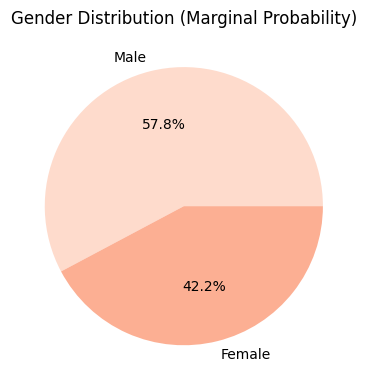

In [56]:
# Pie plot for gender probability
plt.figure(figsize=(5, 4))
plt.pie(gender_dis['Count'],
        labels=gender_dis['Gender'],
        autopct='%1.1f%%',
        colors=sns.color_palette('Reds')[0:len(gender_dis)])
plt.title('Gender Distribution (Marginal Probability)')
plt.tight_layout()
plt.show()


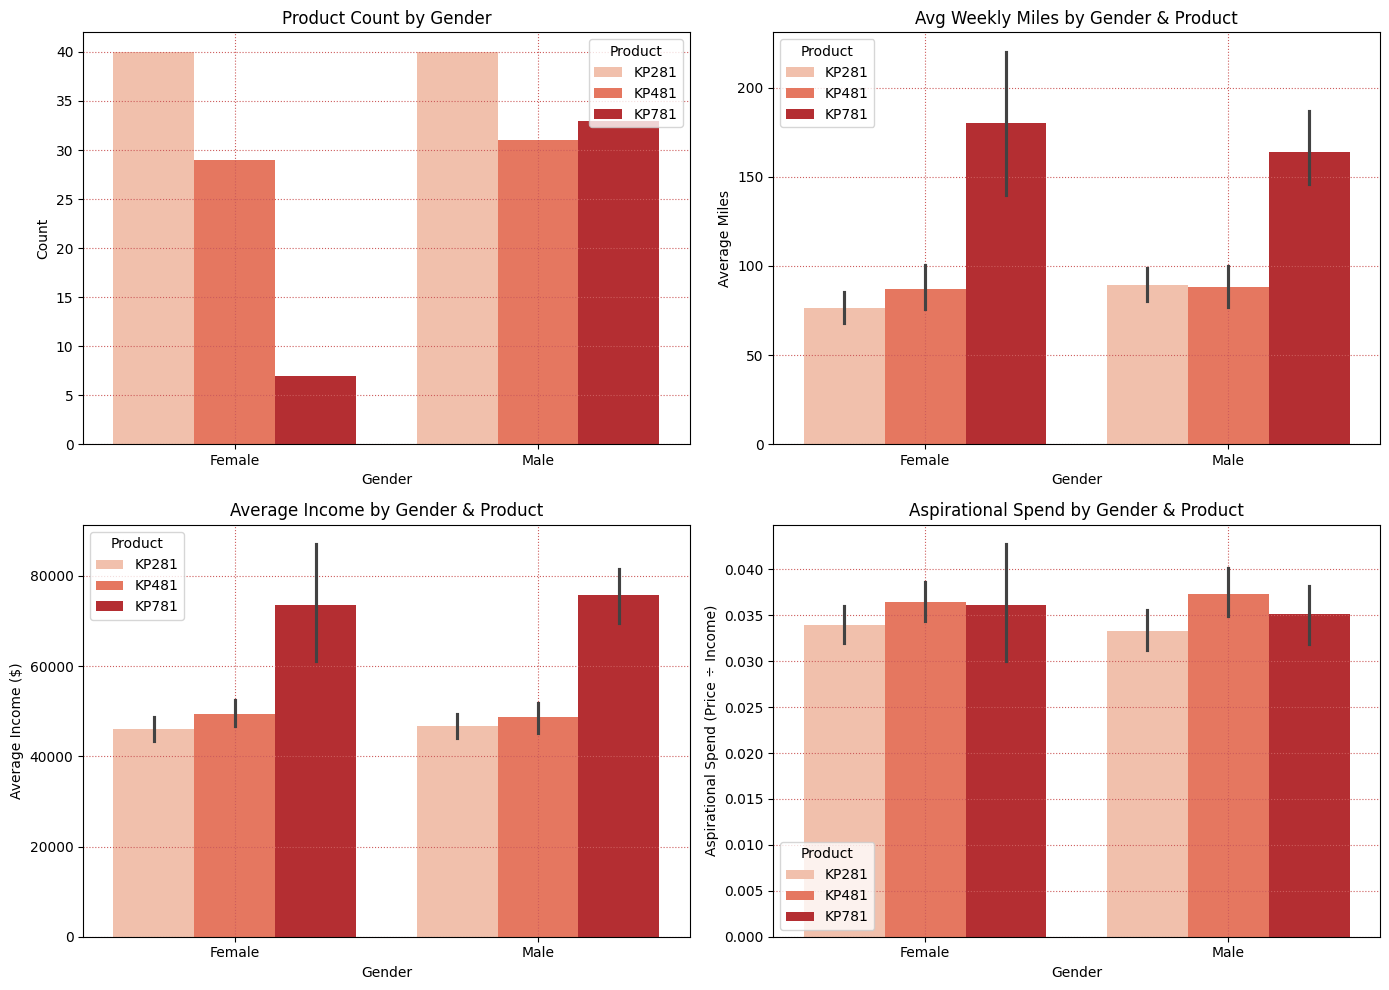

In [57]:
plt.figure(figsize=(14, 10))

# 1. Product Count by Gender
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Gender', hue='Product', palette='Reds')
plt.title('Product Count by Gender')
plt.grid(color="indianred", linestyle=":")
plt.xlabel('Gender')
plt.ylabel('Count')

# 2. Avg Weekly Miles by Gender & Product
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Gender', y='Miles', hue='Product', palette='Reds')
plt.title('Avg Weekly Miles by Gender & Product')
plt.grid(color="indianred", linestyle=":")
plt.xlabel('Gender')
plt.ylabel('Average Miles')

# 3. Avg Income by Gender & Product
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='Gender', y='Income', hue='Product', palette='Reds')
plt.title('Average Income by Gender & Product')
plt.grid(color="indianred", linestyle=":")
plt.xlabel('Gender')
plt.ylabel('Average Income ($)')

# 4. Aspirational Spend (Price/Income) by Gender & Product
plt.subplot(2, 2, 4)
sns.barplot(data=df, x='Gender', y='AspirationalSpend', hue='Product', palette='Reds')
plt.title('Aspirational Spend by Gender & Product')
plt.grid(color="indianred", linestyle=":")
plt.xlabel('Gender')
plt.ylabel('Aspirational Spend (Price ÷ Income)')

plt.tight_layout()
plt.show()


In [58]:
np.round(pd.crosstab(df['Gender'], df['Product'], normalize='index', margins=True),3)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526,0.382,0.092
Male,0.385,0.298,0.317
All,0.444,0.333,0.222


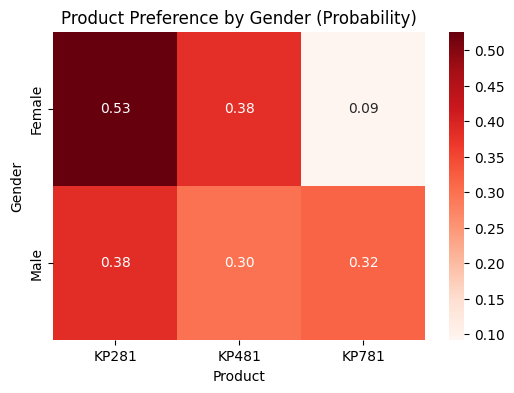

In [59]:
# Create crosstab with conditional probabilities
gender_product_prob = pd.crosstab(df['Gender'], df['Product'], normalize='index')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(gender_product_prob, annot=True, cmap='Reds', fmt='.2f')
plt.title('Product Preference by Gender (Probability)')
plt.xlabel('Product')
plt.ylabel('Gender')
plt.show()


### 🔹 Summary: Gender-Based Analysis

- `Male` customers form the majority of the dataset, with a **marginal probability of 57.8%**, while `Female` customers make up **42.2%**.

- When comparing **product preference by gender** (conditional probability):
  - Females show a strong inclination toward the entry-level `KP281` (**53%**), and lower interest in the premium `KP781` (**9%**).
  - Males have a more balanced preference: `KP281` (**38%**), `KP481` (**30%**), and `KP781` (**32%**).
  - This indicates that **females tend to favor affordability**, while **males are more open to premium models**.

- In terms of **weekly miles** (usage pattern):
  - Males and females show similar patterns for `KP281` and `KP481`.
  - However, for `KP781`, both genders log significantly higher mileage — suggesting it attracts **high-intensity users** regardless of gender.

- On **average income**, both genders show increasing income levels with higher-tier products.
  - Female `KP781` buyers earn slightly less than their male counterparts, but still indicate **financial capability** for the premium segment.

- The **aspirational spend ratio** (Price ÷ Income) reveals that:
  - Male customers tend to allocate **a slightly higher proportion of income** toward premium products.
  - Females appear **more price-conscious**, maintaining consistent spend ratios across all models.

🔵 Overall, gender differences in product preference are backed by both probability and behavioral patterns:
- Females lean toward practical, entry-level models with moderate usage.
- Males show interest in the full product range, particularly in high-value models aligned with higher fitness intensity and income.


### 🔹 3.2 Income Group-Based Analysis

- We explore how income levels affect treadmill choices.  
- This also helps us identify which groups tend to stretch their budget for a higher-end product.


In [60]:
income_dist = df['IncomeGroup'].value_counts().reset_index()
income_dist.columns = ['Income Group', 'Count']
income_dist['Probability'] = np.round(income_dist['Count'] / income_dist['Count'].sum(), 2)
income_dist

,Income Group,Count,Probability
0,Mid Income,90,0.50
1,High Income,45,0.25
2,Low Income,45,0.25


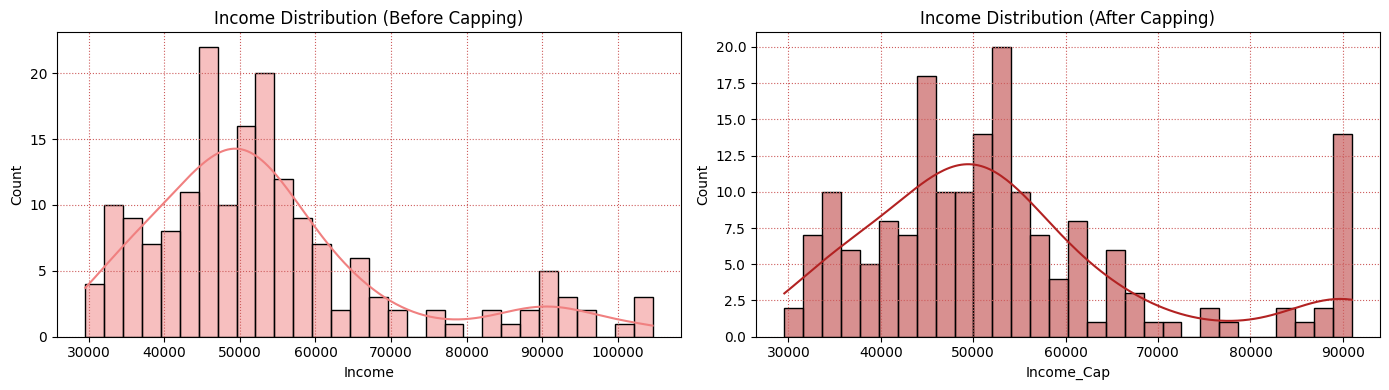

In [61]:
plt.figure(figsize=(14, 4))

# Original Income
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], bins=30, kde=True, color='lightcoral', edgecolor='black')
plt.title("Income Distribution (Before Capping)")
plt.xlabel("Income")
plt.ylabel("Count")
plt.grid(color='indianred', linestyle=':')

# Capped Income
plt.subplot(1, 2, 2)
sns.histplot(df['Income_Cap'], bins=30, kde=True, color='firebrick', edgecolor='black')
plt.title("Income Distribution (After Capping)")
plt.xlabel("Income_Cap")
plt.ylabel("Count")
plt.grid(color='indianred', linestyle=':')

plt.tight_layout()
plt.show()


In [62]:
income_product_prob = pd.crosstab(df['IncomeGroup'], df['Product'], normalize='index')
income_product_prob = np.round(income_product_prob, 2)
income_product_prob


Product,KP281,KP481,KP781
IncomeGroup,,,
High Income,0.16,0.20,0.64
Low Income,0.67,0.33,0.00
Mid Income,0.48,0.40,0.12


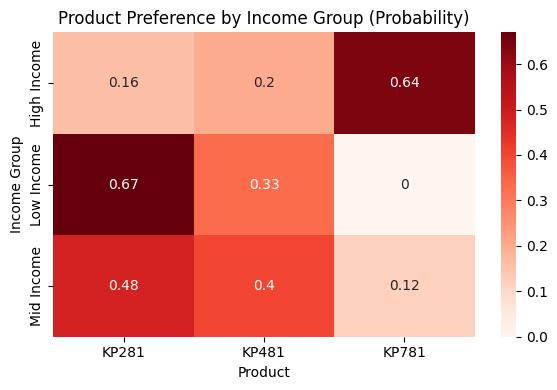

In [63]:
plt.figure(figsize=(6, 4))
sns.heatmap(income_product_prob, annot=True, cmap='Reds', linecolor='gray')
plt.title('Product Preference by Income Group (Probability)')
plt.xlabel('Product')
plt.ylabel('Income Group')
plt.tight_layout()
plt.show()


### 🔹 3.3 Fitness Level-Based Analysis

- We check if fitness-conscious users show a stronger preference for premium or durable models.  
- This helps connect self-reported fitness with purchasing behavior.


In [64]:
fitness_dist = df['Fitness'].value_counts().sort_index().reset_index()
fitness_dist.columns = ['Fitness Level', 'Count']
fitness_dist['Probability'] = np.round(fitness_dist['Count'] / fitness_dist['Count'].sum(), 3)
fitness_dist


,Fitness Level,Count,Probability
0,1,2,0.011
1,2,26,0.144
2,3,97,0.539
3,4,24,0.133
4,5,31,0.172


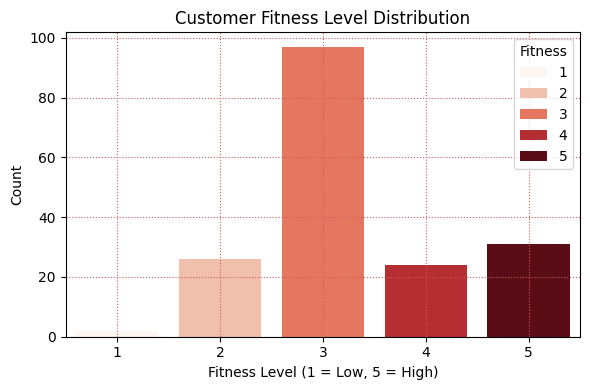

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Fitness',hue='Fitness', palette='Reds')
plt.title('Customer Fitness Level Distribution')
plt.xlabel('Fitness Level (1 = Low, 5 = High)')
plt.ylabel('Count')
plt.grid(color='indianred', linestyle=':')
plt.tight_layout()
plt.show()


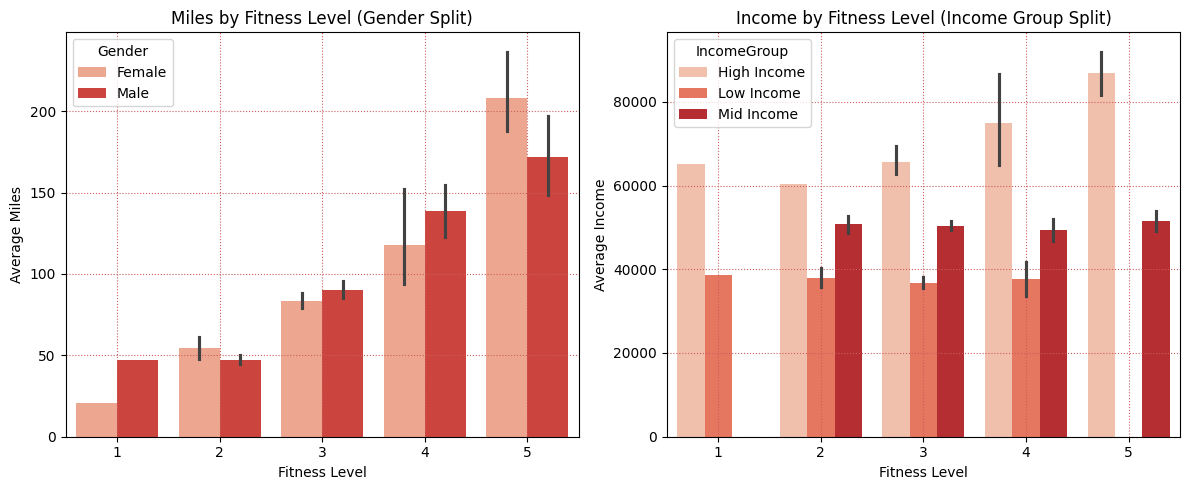

In [66]:
plt.figure(figsize=(12, 5))

# 1. Fitness vs Product by Gender
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Fitness', y='Miles', hue='Gender', palette='Reds')
plt.title('Miles by Fitness Level (Gender Split)')
plt.xlabel('Fitness Level')
plt.ylabel('Average Miles')
plt.grid(color='indianred', linestyle=':')

# 2. Fitness vs Product by Income Group
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Fitness', y='Income', hue='IncomeGroup', palette='Reds')
plt.title('Income by Fitness Level (Income Group Split)')
plt.xlabel('Fitness Level')
plt.ylabel('Average Income')
plt.grid(color='indianred', linestyle=':')


plt.tight_layout()
plt.show()


In [67]:
fitness_product_prob = pd.crosstab(df['Fitness'], df['Product'], normalize='index')
fitness_product_prob = np.round(fitness_product_prob, 2)
fitness_product_prob


Product,KP281,KP481,KP781
Fitness,,,
1,0.50,0.50,0.00
2,0.54,0.46,0.00
3,0.56,0.40,0.04
4,0.38,0.33,0.29
5,0.06,0.00,0.94


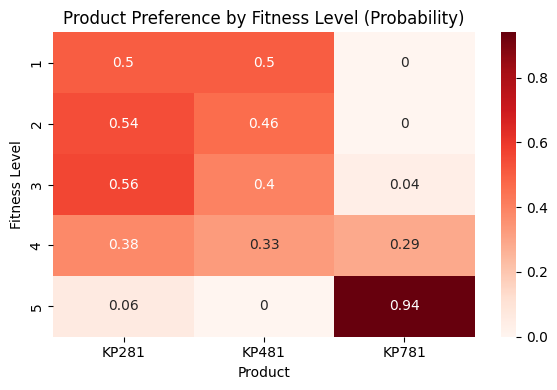

In [68]:
plt.figure(figsize=(6, 4))
sns.heatmap(fitness_product_prob, annot=True, cmap='Reds', linecolor='gray')
plt.title('Product Preference by Fitness Level (Probability)')
plt.xlabel('Product')
plt.ylabel('Fitness Level')
plt.tight_layout()
plt.show()

### 🔹 3.4 Education Level-Based Analysis

- We analyze how education background influences product selection.  
- Grouping customers into school, graduate, and postgraduate levels helps simplify trends.


In [69]:
education_dist = df['EducationGroup'].value_counts().reset_index()
education_dist.columns = ['Education Group', 'Count']
education_dist['Probability'] = np.round(education_dist['Count'] / education_dist['Count'].sum(), 2)
education_dist

,Education Group,Count,Probability
0,Graduate,150,0.83
1,Postgraduate,27,0.15
2,School,3,0.02


<ipython-input-70-a6d1e292328a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_dist, x='Education Group', y='Count', palette='Reds')


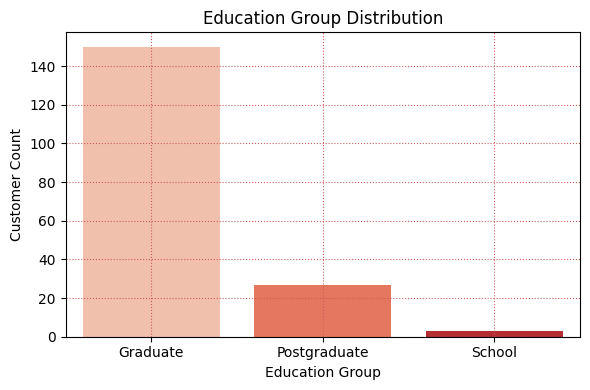

In [70]:
plt.figure(figsize=(6, 4))
sns.barplot(data=education_dist, x='Education Group', y='Count', palette='Reds')
plt.title('Education Group Distribution')
plt.xlabel('Education Group')
plt.ylabel('Customer Count')
plt.grid(color='indianred', linestyle=':')
plt.tight_layout()
plt.show()

In [71]:
education_product_prob = pd.crosstab(df['EducationGroup'], df['Product'], normalize='index')
education_product_prob = np.round(education_product_prob, 2)
education_product_prob

Product,KP281,KP481,KP781
EducationGroup,,,
Graduate,0.51,0.38,0.11
Postgraduate,0.07,0.07,0.85
School,0.67,0.33,0.00


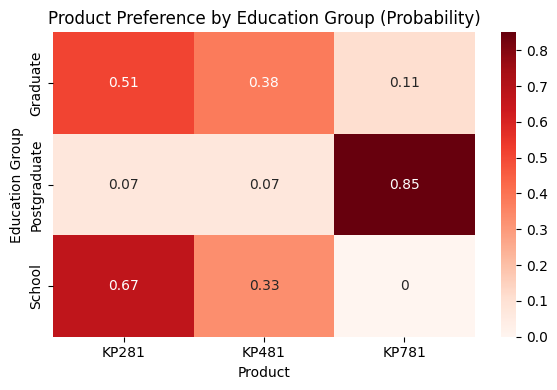

In [72]:
plt.figure(figsize=(6, 4))
sns.heatmap(education_product_prob, annot=True, cmap='Reds', linecolor='gray')
plt.title('Product Preference by Education Group (Probability)')
plt.xlabel('Product')
plt.ylabel('Education Group')
plt.tight_layout()
plt.show()

In [73]:
agegroup_dist = df['AgeGroup'].value_counts().sort_index().reset_index()
agegroup_dist.columns = ['Age Group', 'Count']
agegroup_dist['Probability'] = np.round(agegroup_dist['Count'] / agegroup_dist['Count'].sum(), 2)
agegroup_dist


,Age Group,Count,Probability
0,18-24,54,0.30
1,25-33,84,0.47
2,34-40,25,0.14
3,40-50,17,0.09


<ipython-input-74-bf00998ff9ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agegroup_dist, x='Age Group', y='Count', palette='Reds')


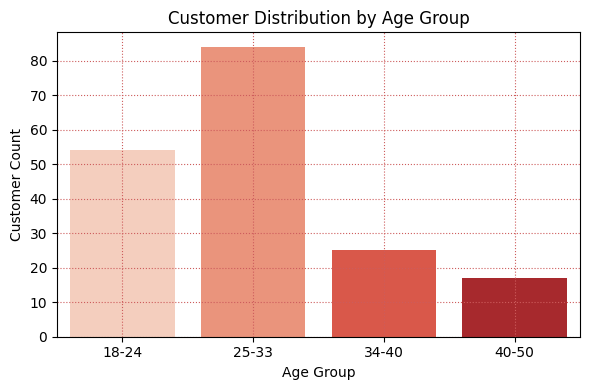

In [74]:
plt.figure(figsize=(6, 4))
sns.barplot(data=agegroup_dist, x='Age Group', y='Count', palette='Reds')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.grid(color='indianred', linestyle=':')
plt.tight_layout()
plt.show()


In [75]:
age_product_prob = pd.crosstab(df['AgeGroup'], df['Product'], normalize='index')
age_product_prob = np.round(age_product_prob, 2)
age_product_prob

Product,KP281,KP481,KP781
AgeGroup,,,
18-24,0.50,0.31,0.19
25-33,0.40,0.33,0.26
34-40,0.48,0.40,0.12
40-50,0.41,0.29,0.29


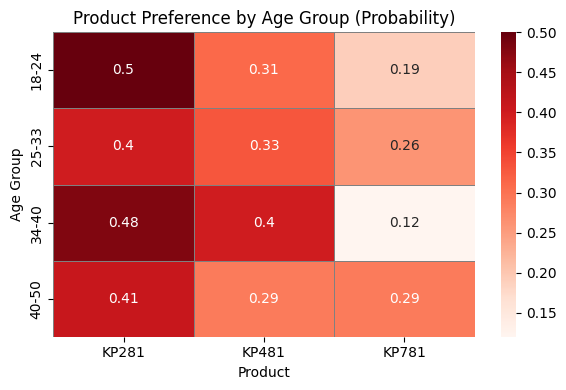

In [76]:
plt.figure(figsize=(6, 4))
sns.heatmap(age_product_prob, annot=True, cmap='Reds', linewidths=0.5, linecolor='gray')
plt.title('Product Preference by Age Group (Probability)')
plt.xlabel('Product')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

### 🔹 3.6 Weekly Miles-Based Analysis

- We look at how the expected treadmill usage (in miles/week) relates to the product purchased.  
- Higher usage may indicate demand for feature-rich or high-end models.


In [77]:
milesgroup_dist = df['MilesGroup'].value_counts().sort_index().reset_index()
milesgroup_dist.columns = ['Miles Group', 'Count']
milesgroup_dist['Probability'] = np.round(milesgroup_dist['Count'] / milesgroup_dist['Count'].sum(), 2)
milesgroup_dist

,Miles Group,Count,Probability
0,Less Active,36,0.20
1,Moderately Active,99,0.55
2,Ultra Active,13,0.07
3,Very Active,32,0.18


<ipython-input-78-acb98f3be095>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=milesgroup_dist, x='Miles Group', y='Count', palette='Reds')


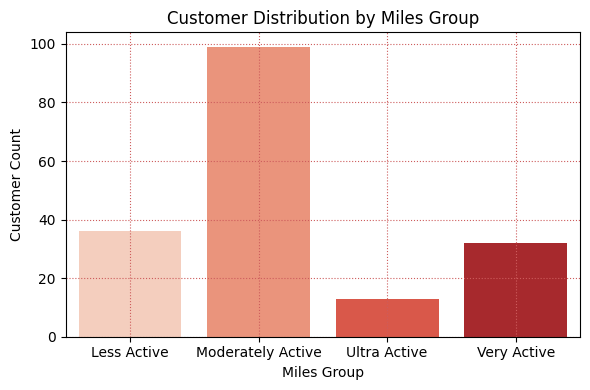

In [78]:
plt.figure(figsize=(6, 4))
sns.barplot(data=milesgroup_dist, x='Miles Group', y='Count', palette='Reds')
plt.title('Customer Distribution by Miles Group')
plt.xlabel('Miles Group')
plt.ylabel('Customer Count')
plt.grid(color='indianred', linestyle=':')
plt.tight_layout()
plt.show()

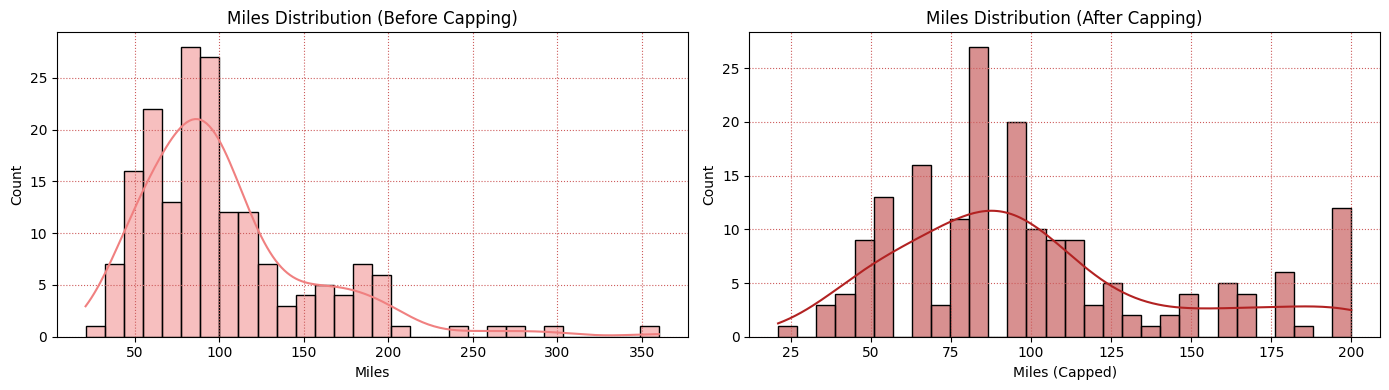

In [79]:
plt.figure(figsize=(14, 4))

# Original Miles
plt.subplot(1, 2, 1)
sns.histplot(df['Miles'], bins=30, kde=True, color='lightcoral', edgecolor='black')
plt.title("Miles Distribution (Before Capping)")
plt.xlabel("Miles")
plt.ylabel("Count")
plt.grid(color='indianred', linestyle=':')

# Capped Miles
plt.subplot(1, 2, 2)
sns.histplot(df['Miles_Cap'], bins=30, kde=True, color='firebrick', edgecolor='black')
plt.title("Miles Distribution (After Capping)")
plt.xlabel("Miles (Capped)")
plt.ylabel("Count")
plt.grid(color='indianred', linestyle=':')

plt.tight_layout()
plt.show()

In [80]:
miles_product_prob = pd.crosstab(df['MilesGroup'], df['Product'], normalize='index')
miles_product_prob = np.round(miles_product_prob, 2)
miles_product_prob

Product,KP281,KP481,KP781
MilesGroup,,,
Less Active,0.50,0.50,0.00
Moderately Active,0.57,0.34,0.09
Ultra Active,0.08,0.08,0.85
Very Active,0.16,0.22,0.62


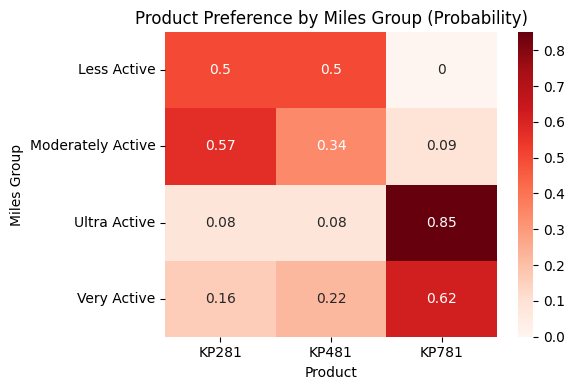

In [82]:
plt.figure(figsize=(6, 4))
sns.heatmap(miles_product_prob, annot=True, cmap='Reds', linecolor='gray')
plt.title('Product Preference by Miles Group (Probability)')
plt.xlabel('Product')
plt.ylabel('Miles Group')
plt.tight_layout()
plt.show()

### 🔹 3.7 Price Sensitivity & Aspirational Spend

- We analyze how much customers are spending relative to their income and expected usage.  
- This helps us understand value perception and aspirational buying behavior.


In [86]:
np.round(df.groupby('Product')['AspirationalSpend'].mean(),4).sort_values()

<ipython-input-86-605c2be7ecca>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  np.round(df.groupby('Product')['AspirationalSpend'].mean(),4).sort_values()


,AspirationalSpend
Product,
KP281,0.0336
KP781,0.0353
KP481,0.0369


<ipython-input-87-e064853f6dbf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Product', y='AspirationalSpend', palette='Reds')


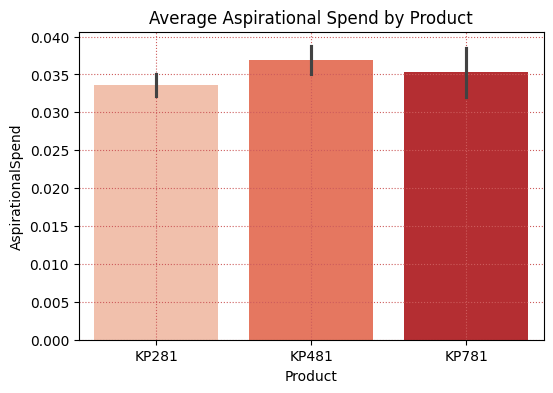

In [87]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Product', y='AspirationalSpend', palette='Reds')
plt.title('Average Aspirational Spend by Product')
plt.grid(color='indianred', linestyle=':')
plt.show()


<ipython-input-88-4dfd64d4a6a4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asp_group = df.groupby(['IncomeGroup', 'Product'])['AspirationalSpend'].mean().reset_index()


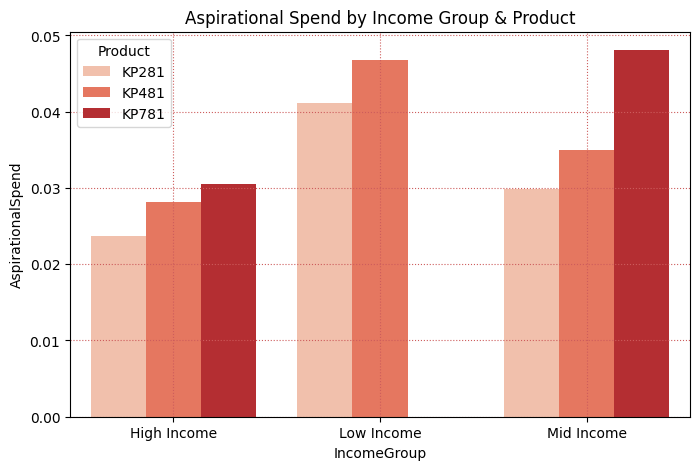

In [88]:
asp_group = df.groupby(['IncomeGroup', 'Product'])['AspirationalSpend'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=asp_group, x='IncomeGroup', y='AspirationalSpend', hue='Product', palette='Reds')
plt.title('Aspirational Spend by Income Group & Product')
plt.grid(color='indianred', linestyle=':')
plt.show()
